# Fine Tuning YOLOv5 model to recognise road signs
Detecting road traffic signs with computer vision is real-world safety. From warning drivers to guiding autonomous vehicles, recognising signs accurately can prevent accidents. In this work i am fine-tuning YOLOv5 to teach it how to detect these road signs clearly and fast. This project shows how AI supports safer roads


I began by added the directory to my dataaset including images and annotations, and confirming both images and annotation folders are of same length.

In [ ]:
from pathlib import Path
data_dir = Path("C:/Users/hp/Documents/Datasets/images/object detection/road signs/train")
images_dir = data_dir / 'images'
annot_dir = data_dir / 'annotations'
assert (len(list(images_dir.iterdir()))) == (len(list(annot_dir.iterdir())))
print((len(list(images_dir.iterdir()))))

878


There are a total of 878 Images and equally annotations. Image files come in different formats (.jpg, .jpeg, .png). Ideally, all images should be in the same format. While it’s not mandatory, mixing formats can cause issues with training scripts or data loaders.

In [ ]:
# To examine imae formats and their distribution
from collections import Counter
files = list(images_dir.iterdir())
file_extension_counts = Counter(file.suffix for file in files)

for extension, count in file_extension_counts.items():
    print(f"Files with extension {extension}: {count}")

Files with extension .jpg: 878


Here i looped through the annotations directory extracting the zipped labels and bounding boxes into a list. The annotations are in txt format.

In [ ]:
from tqdm.notebook import tqdm
files = list(annot_dir.iterdir())
labels = []
boxes = []

for file in tqdm(files):
     with open(file, 'r') as f:
        lines = f.readlines()

        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])
            x_center, y_center, width, height = map(float, parts[1:])
            labels.append(class_id)
            boxes.append([x_center, y_center, width, height])

label_box = [x for x in zip(labels, boxes)]

  0%|          | 0/878 [00:00<?, ?it/s]

In [ ]:
label_box[0:5]

[(9, [0.4888392857142857, 0.49330357142857145, 0.84375, 0.8169642857142857]),
 (9,
  [0.4888392857142857,
   0.49330357142857145,
   0.8839285714285714,
   0.8616071428571429]),
 (9,
  [0.5089285714285714,
   0.5245535714285714,
   0.8638392857142857,
   0.8816964285714286]),
 (9,
  [0.47544642857142855,
   0.5089285714285714,
   0.8839285714285714,
   0.8660714285714286]),
 (9, [0.484375, 0.4955357142857143, 0.96875, 0.9910714285714286])]

Here i created a function that, provided and image and the corresponding zipped label and bounding box, woold open this image and then loop through the zip extracting its label and bounding box and then draws the imae with the bounding box drawn over the object, in this case, the road signs.

In [14]:
from PIL import Image
from torchvision.utils import draw_bounding_boxes
from torchvision.ops import box_convert
import torchvision.transforms.functional as F
import torch

def draw(img_path, label_box):
    image = Image.open(img_path)
    image = image.resize((416, 416))
    img_w, img_h = image.size

    label = []
    lbox = []

    for lab, box in label_box:
        label.append(str(lab))
        cx, cy, w, h = box
        lbox.append([cx * img_w, cy * img_h, w * img_w, h * img_h])

    box_t = torch.tensor(lbox, dtype=torch.float)
    xyxy_fmt = box_convert(box_t, in_fmt='cxcywh', out_fmt='xyxy')

    image_tensor = F.to_tensor(image)

    image = draw_bounding_boxes(
        image=image_tensor,
        boxes=xyxy_fmt,
        labels=label,
        width=2,
        font_size=10
    )

    return image

In [ ]:
image_path = list(images_dir.iterdir())[0]
box = [label_box[0]]

figure = draw(image_path, box)

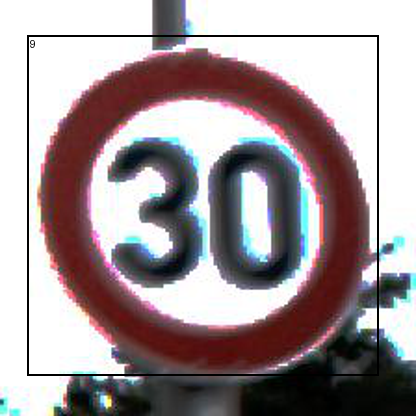

In [ ]:
from torchvision.transforms.functional import to_pil_image
to_pil_image(figure)

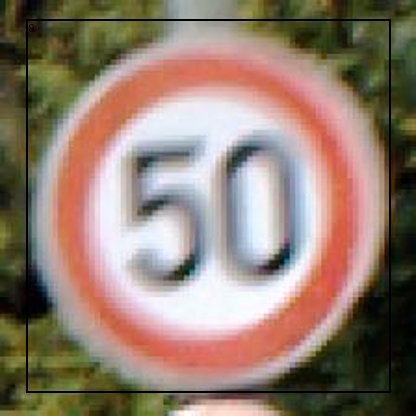

In [ ]:
image_path1 = list(images_dir.iterdir())[10]
box1 = [label_box[10]]

figure2 = draw(image_path1, box1)
to_pil_image(figure2)

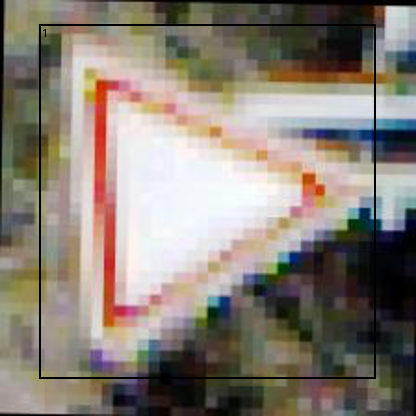

In [ ]:
image_path2 = list(images_dir.iterdir())[20]
box2 = [label_box[20]]

figure3 = draw(image_path2, box2)
to_pil_image(figure3)

From this point i moved the training to Colab, i decided to up the YOLO model to v5, so T4 woffers the speed to train the model.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing YOLOv5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17511, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 17511 (delta 5), reused 0 (delta 0), pack-reused 17493 (from 3)
Receiving objects: 100% (17511/17511), 16.60 MiB | 23.58 MiB/s, done.
Resolving deltas: 100% (11993/11993), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 

In [3]:
#Training for 50 epochs,
!python train.py --img 640 --batch 16 --epochs 50 --data /content/drive/MyDrive/Images/rsFolder/data.yaml --weights yolov5s.pt --name yolov5_road_signs3

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
       6/49      4.42G     0.0401    0.01237    0.05352         32        640:  75% 41/55 [00:16<00:05,  2.75it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       6/49      4.42G    0.03998    0.01238     0.0535         30        640:  76% 42/55 [00:17<00:05,  2.37it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       6/49      4.42G    0.03981    0.01232    0.05352         29        640:  78% 43/55 [00:17<00:04,  2.78it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):


In [7]:
# Saving the model's weights.
!cp runs/train/yolov5_road_signs3/weights/best.pt /content/drive/MyDrive/Model/

In [19]:
# Loading the saved model
import torch
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/yolov5_road_signs3/weights/best.pt')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


Below i tested the model with signs from the test dataset

/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 224x224 1 No Parking
Speed: 9.5ms pre-process, 10.2ms inference, 4.1ms NMS per image at shape (1, 3, 640, 640)


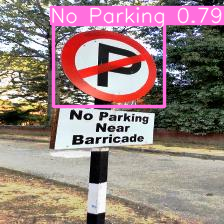

/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 224x224 1 Narrow Bridge Ahead
Speed: 21.2ms pre-process, 18.2ms inference, 3.0ms NMS per image at shape (1, 3, 640, 640)


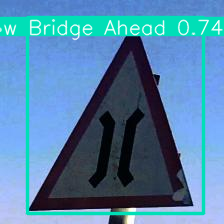

/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 224x224 1 Bump Ahead
Speed: 136.0ms pre-process, 7.1ms inference, 6.1ms NMS per image at shape (1, 3, 640, 640)


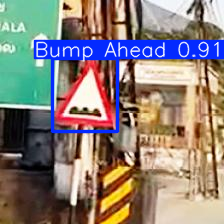

/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 224x224 (no detections)
Speed: 7.7ms pre-process, 8.8ms inference, 4.1ms NMS per image at shape (1, 3, 640, 640)


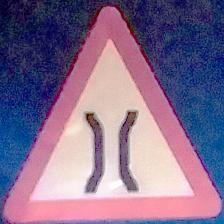

/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 224x224 1 Go Slow
Speed: 6.9ms pre-process, 8.8ms inference, 4.6ms NMS per image at shape (1, 3, 640, 640)


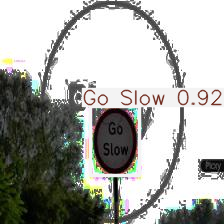

/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 224x224 1 No Overtaking, 1 Speed Limit
Speed: 7.4ms pre-process, 8.4ms inference, 4.9ms NMS per image at shape (1, 3, 640, 640)


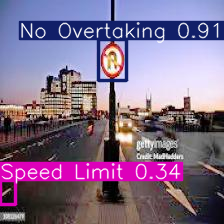

/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 224x224 1 No Parking
Speed: 7.0ms pre-process, 8.8ms inference, 4.7ms NMS per image at shape (1, 3, 640, 640)


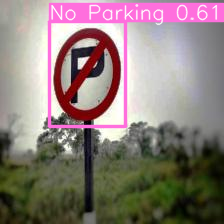

/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 224x224 1 No Overtaking
Speed: 6.9ms pre-process, 9.4ms inference, 4.0ms NMS per image at shape (1, 3, 640, 640)


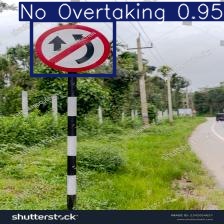

/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 224x224 1 pedestrian crossing
Speed: 7.0ms pre-process, 8.5ms inference, 5.0ms NMS per image at shape (1, 3, 640, 640)


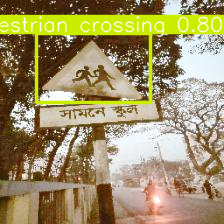

/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 224x224 1 sign-board
Speed: 7.2ms pre-process, 8.4ms inference, 5.6ms NMS per image at shape (1, 3, 640, 640)


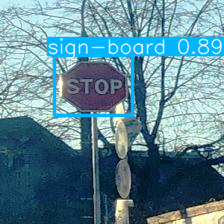

/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 224x224 1 Narrow Bridge Ahead, 1 pedestrian crossing
Speed: 7.2ms pre-process, 10.0ms inference, 4.1ms NMS per image at shape (1, 3, 640, 640)


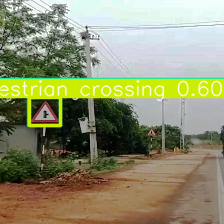

/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 224x224 1 Narrow Bridge Ahead
Speed: 6.4ms pre-process, 9.1ms inference, 4.5ms NMS per image at shape (1, 3, 640, 640)


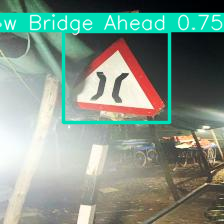

In [30]:
signs = [
    '/content/drive/MyDrive/Images/test/IMG_20221218_143250_jpg.rf.c17f4e7c47602bd51180ad0fa7507700.jpg',
    '/content/drive/MyDrive/Images/test/IMG_2822_jpg.rf.239ddce937891b5410a5a38c77e5469c.jpg',
    '/content/drive/MyDrive/Images/test/Screenshot-2025-02-11-191615_png.rf.b21638412a92dd7b69606fdab75c6ff9.jpg',
    '/content/drive/MyDrive/Images/test/20200119_191527_025_jpg.rf.3acb76e3f9e8274521221547e7b4c6a4.jpg',
    '/content/drive/MyDrive/Images/test/Untitledzaaz_jpeg.rf.ed3a6b8b4d3e054b67ae44d55b7bd48b.jpg',
    '/content/drive/MyDrive/Images/test/download-6-_jpg.rf.c9da71bb62f0a05f57c4fc47c117d5e7.jpg',
    '/content/drive/MyDrive/Images/test/istockphoto-1325030803-612x612_jpg.rf.65ebbf78cfa6d80b5e2dc8812c69608f.jpg',
    '/content/drive/MyDrive/Images/test/stock-photo-overtaking-prohibited-sign-board-no-overtaking-sign-board-on-road-2342054657_jpg.rf.dbb873f7751ac032748b13cc2160b82f.jpg',
    '/content/drive/MyDrive/Images/test/school-in-front13_jpg.rf.ac18bf49e1f079ba36672325d32113a2.jpg',
    '/content/drive/MyDrive/Images/test/road354_png.rf.71787ca7e63125e4a606ddbf7c053906.jpg',
    '/content/drive/MyDrive/Images/test/photo1696621893-3-_jpeg.rf.544fbd7e70db3a34c56985f1ba9a0198.jpg',
    '/content/drive/MyDrive/Images/test/photo1696589750_jpeg.rf.d33aeed61e279e0841a2bd550d8fe44d.jpg'
]

for sign in signs:
  result = model(sign)
  result.print()
  result.show()

# Conclusion
The model achieved a precision of 88% recall of 90.5%, mAP\@0.5 of 92.1%, and mAP\@0.5:0.95 of 73% across 13 traffic sign classes. These metrics show the model’s ability to detect signs accurately and consistently, with particularly strong performance on signs like "Give Way", "School Ahead", and "Go Slow". Some signs like "Narrow Bridge Ahead" had slightly lower performance, likely due to fewer samples or annotation quality, but overall, the results are promising.


This project demonstrates how powerful YOLOv5 can be for detecting road traffic signs when fine-tuned on a custom dataset. After 50 epochs, the model delivered strong performance across most classes, with impressive precision and recall. While a few classes could benefit from more samples or better annotation, the results show that a reliable traffic sign detection model is achievable with the right training setup.
